In [1]:
import pandas as pd
from standard_precip import spi

Read in Monthly Precipitation Data

In [2]:
df_rainfall = pd.read_csv('../data/wichita_rain.csv')
df_rainfall.head()

,date,precip
0,1980-01-01,46.3
1,1980-02-01,20.7
2,1980-03-01,101.3
3,1980-04-01,27.2
4,1980-05-01,67.5


Create SPI Instance

In [3]:
spi_rain = spi.SPI()

Calculate Monthly SPI (1-Month) using Gamma Distribution and L-moments

In [4]:
spi_monthly = spi_rain.calculate(df_rainfall, 'date', 'precip', freq="M", scale=1, 
                                 fit_type="lmom", dist_type="gam")
spi_monthly.head()

,date,precip,precip_calculated_index
0,1980-01-01,46.3,1.230454
1,1980-02-01,20.7,-0.100935
2,1980-03-01,101.3,0.878294
3,1980-04-01,27.2,-0.733749
4,1980-05-01,67.5,-0.551073


Calculate Monthly SPI (3-Month) using Gamma Distribution and MLE

In [5]:
spi_3monthly = spi_rain.calculate(df_rainfall, 'date', 'precip', freq="M", scale=3, 
                                  fit_type="mle", dist_type="gam")
spi_3monthly.head()

,date,precip_scale_3,precip_scale_3_calculated_index
0,1980-01-01,NaN,NaN
1,1980-02-01,NaN,NaN
2,1980-03-01,168.3,0.863263
3,1980-04-01,149.2,0.117547
4,1980-05-01,196.0,-0.480515


Plot 3-month SPI 

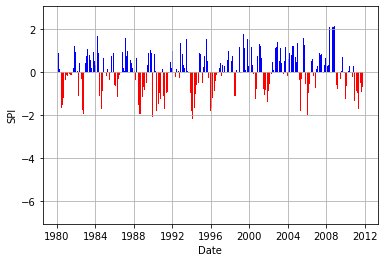

In [6]:
from standard_precip.utils import plot_index

fig = plot_index(spi_3monthly, 'date', 'precip_scale_3_calculated_index')

Read daily precipitation data and calculate SPI

In [9]:
df_daily = pd.read_csv('../data/daily_data.csv')
df_daily.head()

,date,precip
0,1970-12-01,0.0
1,1970-12-02,0.0
2,1970-12-03,0.0
3,1970-12-04,0.0
4,1970-12-05,0.0


In [10]:
spi_daily = spi.SPI()
df_spi_daily = spi_daily.calculate(df_daily, 'date', 'precip', freq="D", scale=1, 
                                   fit_type="lmom", dist_type="gam")
df_spi_daily.head()

,date,precip,precip_calculated_index
0,1970-12-01,0.0,0.532190
1,1970-12-02,0.0,0.880888
2,1970-12-03,0.0,1.236652
3,1970-12-04,0.0,0.985610
4,1970-12-05,0.0,1.102440
